In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
!ls '/content/gdrive/My Drive/Colab Notebooks'

cifar10_model.pth	 moons_validation.csv
circles_model.pth	 opencv.ipynb
circles_train.csv	 perceptron.ipynb
circles_validation.csv	 perceptron_multiplicar.ipynb
cruzadas_model.pth	 planar_model.pth
cruzadas_train.csv	 planar_train.csv
cruzadas_validation.csv  planar_validation.csv
k-means.ipynb		 pytorchClasifica.ipynb
LAC_cnn_cifar10.ipynb	 pytorchClasificaSoluciones.ipynb
LAC_cnn_mnist.ipynb	 pytorchPerceptron.ipynb
mean_and_std.csv	 spirals_model.pth
mnist_model.pth		 spirals_train.csv
moons_model.pth		 spirals_validation.csv
moons_train.csv


Using device: cuda:0

Tesla T4
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB

Total 70000 Train 86% - Validation: 14% samples

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax()
)

Epoch 0 - Training loss: 0.6564 - Validation accuracy: 0.9060 at iter 938 *
Epoch 1 - Training loss: 0.2824 - Validation accuracy: 0.9325 at iter 1876 *
Epoch 2 - Training loss: 0.2161 - Validation accuracy: 0.9420 at iter 2814 *
Epoch 3 - Training loss: 0.1724 - Validation accuracy: 0.9558 at iter 3752 *
Epoch 4 - Training loss: 0.1428 - Validation accuracy: 0.9607 at iter 4690 *
Epoch 5 - Training loss: 0.1211 - Validation accuracy: 0.9690 at iter 5628 *
Epoch 6 - Training loss: 0.1052 - Validation accuracy: 0.9734 at iter 6566 *
Epoch 7 - Training loss: 0.0921 - Validation accuracy: 0.9768 at iter 7504 *
Epoch 8 - Trai

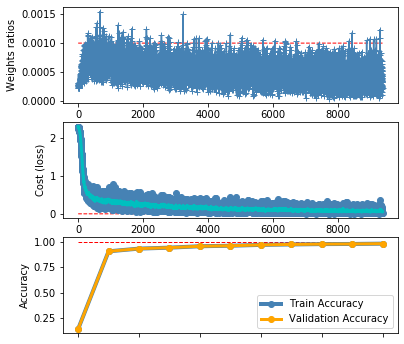

In [7]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

# setting device on GPU if available, else CPU
# Using CPU or GPUs
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
    print()

name, epochs = 'mnist', 10 # training time -> approx. 1 minute per epoch
my_batch_size=64

def get_accuracy(my_model, my_loade, device):
    ''' Function for returning accuracy of a model for a mnist loader data.
    '''
    correct_count, all_count = 0, 0
    for images, labels in my_loader:
        images = images.to(device)
        labels = labels.to("cpu")

        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = my_model(img)

            ps = torch.exp(logps).to("cpu")
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if (true_label == pred_label):
                correct_count += 1
            all_count += 1
    return(correct_count / all_count)

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
classes = valset.classes
n_classes = len(valset.classes)
total_samples = trainset.__len__() + valset.__len__()
print('Total {:.0f} Train {:.0f}% - Validation: {:.0f}% samples'.format(total_samples, trainset.__len__()*100/total_samples,valset.__len__()*100/total_samples))
print()

my_loader = torch.utils.data.DataLoader(trainset, batch_size=my_batch_size, shuffle=True, num_workers = 8)
my_loader_train = torch.utils.data.DataLoader(trainset, batch_size=my_batch_size, num_workers = 8)
my_loader_validation = torch.utils.data.DataLoader(valset, batch_size=my_batch_size, shuffle=True, num_workers = 8)

# dataiter = iter(my_loader)
# images, labels = dataiter.next()
# print(images.shape)
# print(labels.shape)
#
# plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
# plt.show()
#
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images + 1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
# plt.show()

input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)
print()

model.train()
if torch.cuda.is_available(): 
  model.cuda()

criterion = nn.NLLLoss()

learning_rate = 0.003
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Supervised Training.
time0 = time()

best_validation_accuracy = 0.
max_iter = my_loader.__len__()*epochs
cost = np.zeros((max_iter, 1))
ucost = np.zeros((max_iter, 1))
acc = []
acc.append([get_accuracy(model, my_loader_train, device), get_accuracy(model, my_loader_validation, device)])
weight_ratios = np.zeros((max_iter, 1))
t, c_ant, beta = 0, 0, 0.9

for e in range(epochs):
    running_loss = 0
    for k, (images, labels) in enumerate(my_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        # This is where the model learns by backpropagating
        # Gradient calculation.
        weights = model[0].weight.data.to("cpu").numpy().ravel()
        loss.backward()
        grads_lr = model[0].weight.grad.to("cpu").numpy().ravel() * learning_rate
        weight_ratios[t] = np.linalg.norm(grads_lr) / np.linalg.norm(weights)

        # Plot loss y su media movil
        # cost[t] = loss.detach().numpy()
        cost[t] = loss.item()
        c_act = (1-beta)*cost[t] + beta * c_ant
        ucost[t]= c_act / (1-beta**(t+1))
        c_ant = c_act
        t+=1

        # # Print loss every 10 iterations.
        # if k % 10 == 0:
        #     print('Loss {:.4f} at iter {:d}'.format(loss.item(), t))

        # And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        train_accuracy = get_accuracy(model, my_loader_train, device)
        validation_accuracy = get_accuracy(model, my_loader_validation, device)
        acc.append([train_accuracy, validation_accuracy])

        best = ' '
        if (validation_accuracy >= best_validation_accuracy):
            best = '*'
            loss_bestmodel = running_loss / len(my_loader)
            iter_bestmodel = t
            # torch.save(model, name + '_model.pth')
            torch.save(model.state_dict(), '/content/gdrive/My Drive/Colab Notebooks/' + name + '_model.pth')
            best_validation_accuracy = validation_accuracy

        print('Epoch {:d} - Training loss: {:.4f} - Validation accuracy: {:.4f} at iter {:d} {:s}'.format(e, running_loss / len(my_loader), validation_accuracy, t, best))

print("\nTraining Time (in minutes) =", (time() - time0) / 60)

# Now, we plot the optimization results.
fig, ax = plt.subplots(3, 1, figsize=(6,6))
ax[0].plot(range(max_iter), np.ones(max_iter)*0.001,'r-', linewidth=1, ls='--')
ax[0].plot(range(max_iter), weight_ratios, color='steelblue', marker='+')
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Weights ratios")
# Plot the loss C.
ax[1].plot(range(max_iter), np.zeros(max_iter),'r-', linewidth=1, ls='--')
ax[1].plot(range(max_iter), cost, color='steelblue', marker='o')
ax[1].plot(range(max_iter), ucost,'c-', linewidth=3)
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Cost (loss)")
# Plot the accuracies
acc_train = np.array(acc)[:,0]
acc_validation = np.array(acc)[:,1]
ax[2].plot(range(len(acc_train)), np.ones(len(acc_train)),'r-', linewidth=1, ls='--')
ax[2].plot(acc_train, color='steelblue', marker='o', linewidth=4.0, label='Train Accuracy')
ax[2].plot(acc_validation, color='orange', marker='o', linewidth=3.0, label='Validation Accuracy')
ax[2].set_xticklabels([])
ax[2].set_ylabel("Accuracy")
ax[2].legend()
plt.show(block=True)


Number Of Validatrion Images = 10000

Validation Accuracy = 0.9811666666666666
Predicted Digit = 5


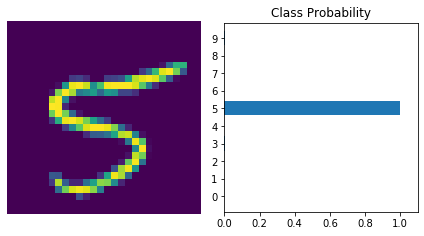

Accuracy of 0 - zero : 98 %
Accuracy of 1 - one : 99 %
Accuracy of 2 - two : 96 %
Accuracy of 3 - three : 98 %
Accuracy of 4 - four : 96 %
Accuracy of 5 - five : 97 %
Accuracy of 6 - six : 96 %
Accuracy of 7 - seven : 97 %
Accuracy of 8 - eight : 96 %
Accuracy of 9 - nine : 94 %


In [8]:

best_net = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# best_net = torch.load(name + '_model.pth')
best_net.load_state_dict(torch.load('/content/gdrive/My Drive/Colab Notebooks/' + name + '_model.pth'))
best_net.eval()
print("Number Of Validatrion Images =", valset.__len__())
print("\nValidation Accuracy =", best_validation_accuracy)

images, labels = next(iter(my_loader_validation))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = best_net(img)

ps = torch.exp(logps).to("cpu")
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

# what are the classes that performed well, and the classes that did not perform well
class_correct = list(0. for i in range(n_classes))
class_total = list(0. for i in range(n_classes))
with torch.no_grad():
    for images, labels in my_loader_validation:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = best_net(img)

            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if (true_label == pred_label):
                class_correct[true_label] += 1
            class_total[true_label] += 1

for i in range(n_classes):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))